In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

tf.enable_eager_execution()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
%autosave 60

/opt/anaconda3/envs/dnn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/dnn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/dnn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/dnn/lib/python3.7/site-packages/tensorflow/python/framework

Autosaving every 60 seconds


In [40]:
#Load Dataset

from sklearn.model_selection import train_test_split
data_train, data_test = tf.keras.datasets.mnist.load_data()

# separate a validation set
x_train, y_train = data_train 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

x_test, y_test = data_test

# treating images as vectors and create one hot representations of labesl

x_train = x_train.reshape([-1, 28 * 28])
x_val = x_val.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

y_train = tf.one_hot(y_train, depth=10).numpy()
y_val = tf.one_hot(y_val, depth=10).numpy()
y_test = tf.one_hot(y_test, depth=10).numpy()


print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)



Shape of training input:  (48000, 784)
Shape of training labels:  (48000, 10)
Shape of validation input:  (12000, 784)
Shape of validation labels:  (12000, 10)
Shape of test input:  (10000, 784)
Shape of test labels:  (10000, 10)


In [76]:
def Discriminator():
    model = keras.Sequential()
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units = 10, activation = 'sigmoid'))
    model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))
    
    return model
    

In [82]:
def Generator():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units = 10, activation = 'sigmoid'))
    model.add(keras.layers.Dense(units = 784, activation = 'sigmoid'))

    return model


In [105]:
d = Discriminator()
g = Generator()

x_train = tf.convert_to_tensor(x_train)
x_train = tf.cast(x_train, tf.float32)

train = x_train[0:10,:]
print(np.shape(train))

d.predict(train);

(10, 784)


In [112]:
seed = np.random.rand(1,1)
fake = g.predict(seed);



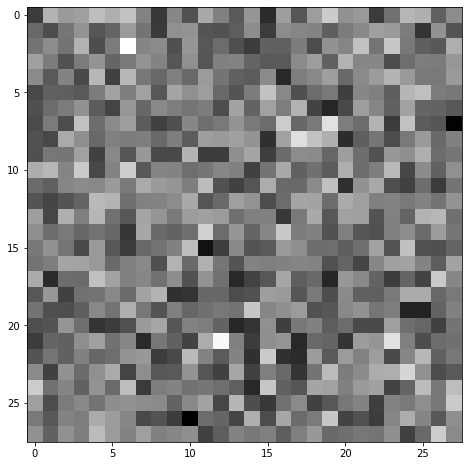

In [113]:
from vis_utils import visualize_grid

fake = fake.reshape([fake.shape[0], 28, 28, 1])

plt.imshow(visualize_grid(fake))